In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import tensorflow as tf
import string 
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
working_directory = os.getcwd()
train = pd.read_csv(working_directory + '/written_name_train_v2.csv')
valid = pd.read_csv(working_directory + '/written_name_validation_v2.csv')

In [6]:
train.head(10)

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE
5,TRAIN_00006.jpg,LUCIE
6,TRAIN_00007.jpg,NASSIM
7,TRAIN_00008.jpg,ASSRAOUI
8,TRAIN_00009.jpg,LAVIAN
9,TRAIN_00010.jpg,MAEVA


In [4]:
valid.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


In [5]:
train.describe()

,FILENAME,IDENTITY
count,330961,330396
unique,330961,100539
top,TRAIN_00001.jpg,THOMAS
freq,1,1825


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [7]:
train.shape

(330961, 2)

In [8]:
valid.shape

(41370, 2)

In [9]:
train.value_counts()

FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_291526.jpg  CAMPOURCY    1
TRAIN_291506.jpg  BELLO        1
TRAIN_291505.jpg  BOISSIERE    1
TRAIN_291504.jpg  LOUNA        1
                              ..
TRAIN_191201.jpg  CHOMEL       1
TRAIN_191200.jpg  BARDIN       1
TRAIN_19120.jpg   LAURI-ANN    1
TRAIN_191199.jpg  TILLEMAN     1
TRAIN_99999.jpg   DIMITRI      1
Length: 330396, dtype: int64

In [10]:
train.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [11]:
valid.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [12]:
valid.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [13]:
train.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [14]:
train.isnull().sum()

FILENAME      0
IDENTITY    565
dtype: int64

In [15]:
valid.isnull().sum()

FILENAME     0
IDENTITY    78
dtype: int64

In [16]:
train.isnull().any()

FILENAME    False
IDENTITY     True
dtype: bool

In [17]:
train = train.dropna()

In [18]:
valid = valid.dropna()

In [19]:
train.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [20]:
valid.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [21]:
list_1 = list(train.columns)
print(list_1)

['FILENAME', 'IDENTITY']


In [22]:
list_cate = []
for i in list_1:
    if train[i].dtype=='object':
        list_cate.append(i)
print(list_cate)

['FILENAME', 'IDENTITY']


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [25]:
train

,FILENAME,IDENTITY
0,0,6790
1,1,88373
2,2,9411
3,3,54452
4,4,24870
...,...,...
330956,263609,59046
330957,263610,92820
330958,263611,23178
330959,263613,70125


In [26]:
X = train.drop('FILENAME', axis=1)
y = train['FILENAME']

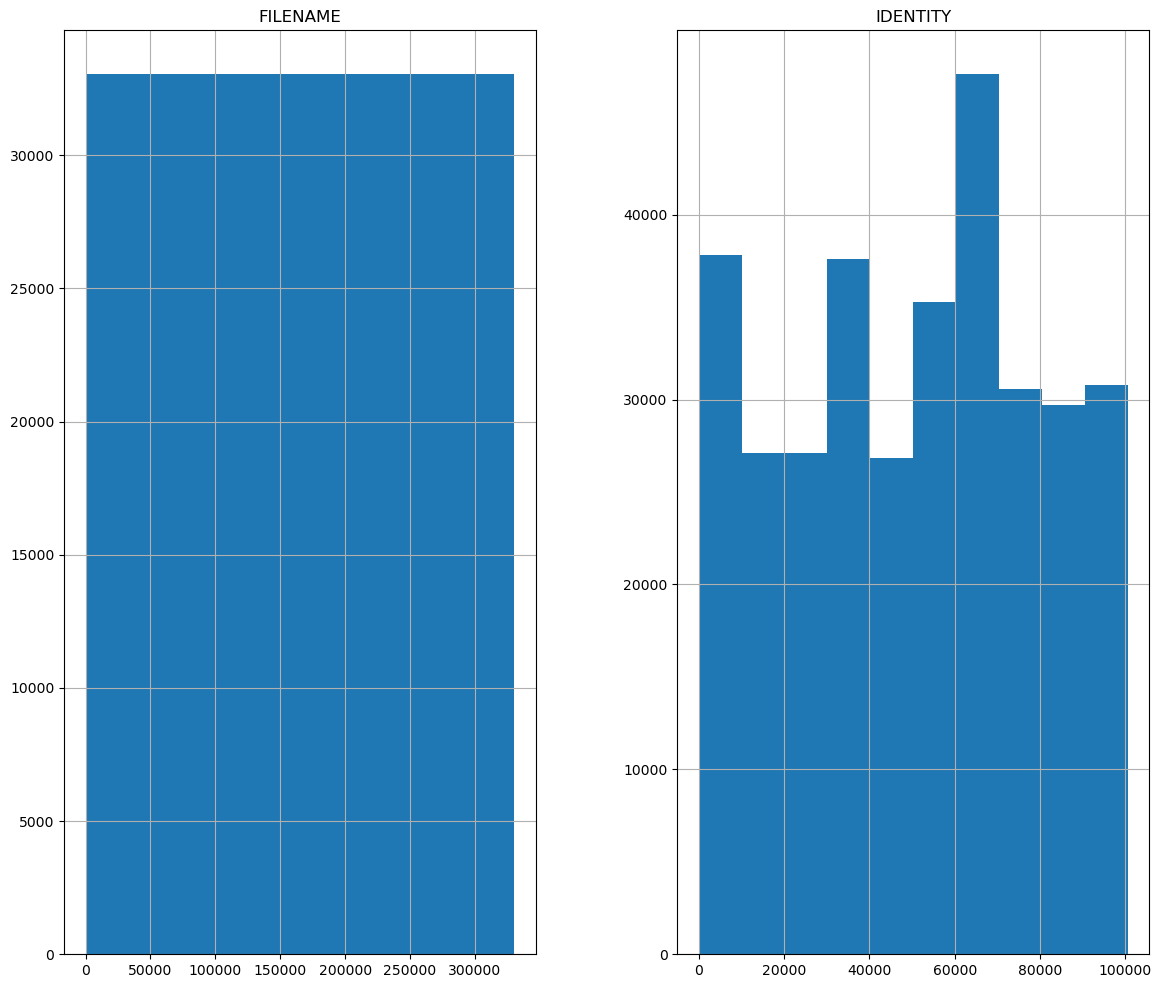

In [27]:
#Histogram
train.hist(figsize = (14,12))
plt.show()

In [28]:
train.corr()
'''This code is using the corr method of pandas dataframe to compute the pairwise correlation of all columns in train,excluding NA/null values12. 
The correlation method used is ‘pearson’ by default, which is the standard correlation coefficient.
The result is a dataframe that shows the correlation matrix of train, where each cell represents the correlation between two columns.
The correlation values range from -1 to 1, where -1 means perfect negative correlation, 0 means no correlation, and 1 means perfect positive correlatio'''

'This code is using the corr method of pandas dataframe to compute the pairwise correlation of all columns in train,excluding NA/null values12. \nThe correlation method used is ‘pearson’ by default, which is the standard correlation coefficient.\nThe result is a dataframe that shows the correlation matrix of train, where each cell represents the correlation between two columns.\nThe correlation values range from -1 to 1, where -1 means perfect negative correlation, 0 means no correlation, and 1 means perfect positive correlatio'

'the seaborn.heatmap function to plot a heatmap of the correlation matrix of train, which is computed by train.corr().\nThe annot parameter is set to True, which means that the values of the correlation matrix will be shown on the heatmap3.'

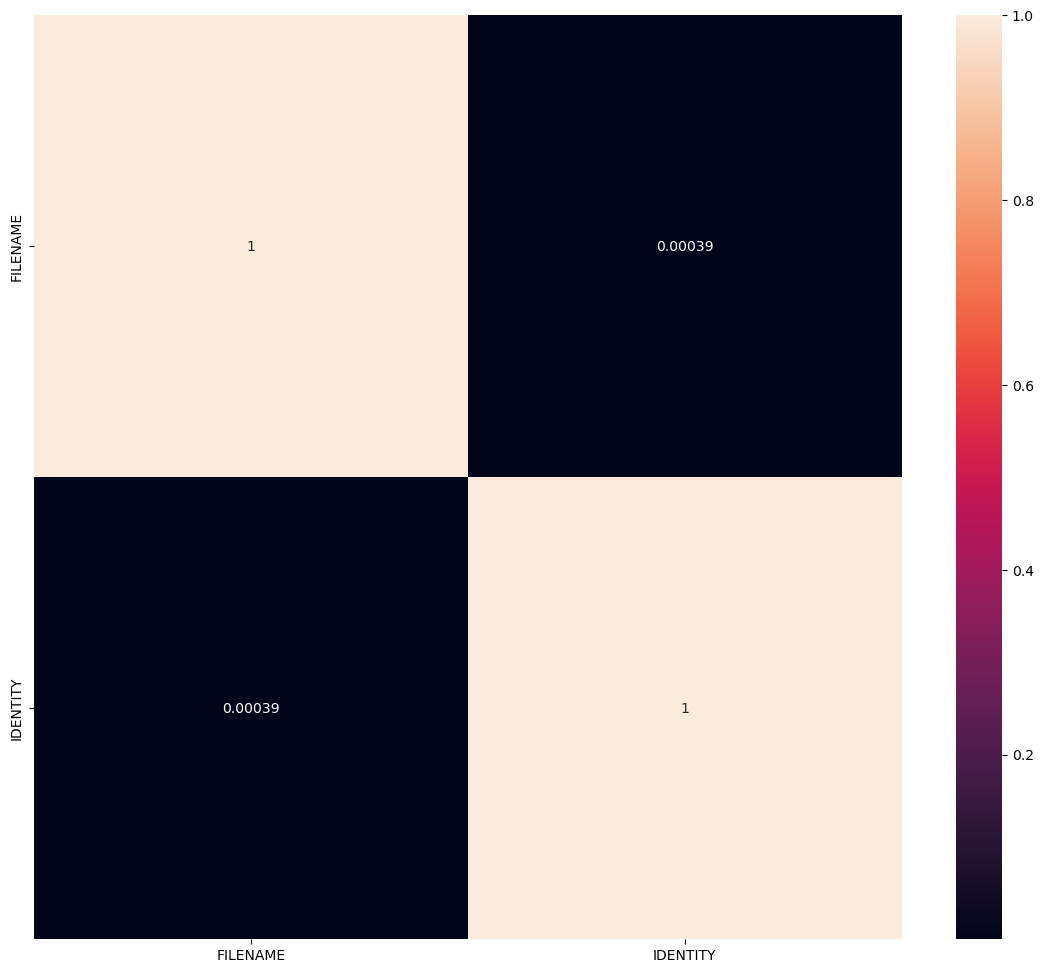

In [29]:
#heatmap
plt.figure(figsize = (14,12))

sns.heatmap(train.corr(), annot = True)
'''the seaborn.heatmap function to plot a heatmap of the correlation matrix of train, which is computed by train.corr().
The annot parameter is set to True, which means that the values of the correlation matrix will be shown on the heatmap3.'''

'This code is using the matplotlib.pyplot and seaborn modules to create and visualize two subplots in a single figure.\nThe first line is using the figure function with the figsize parameter to set the size of the figure in inches12.\nThe second line is using the set_style function to set the background style of the plots to ‘whitegrid’.\nThe third line is using the subplot function to create a subplot with 2 rows and 3 columns, and select the first subplot as the current one34.\nThe fourth line is using the boxplot function to plot a boxplot of the ‘FILENAME’ column of train on the first subplot.\nThe fifth line is using the subplot function again to select the second subplot as the current one.\nThe sixth line is using the boxplot function to plot a boxplot of the ‘IDENTITY’ column of train on the second subplot.'

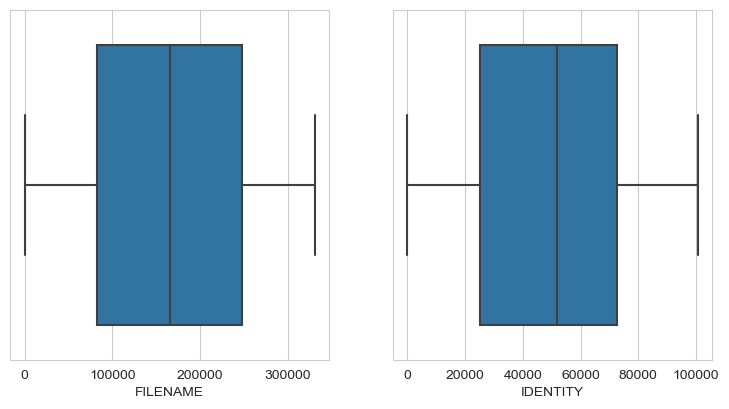

In [30]:
plt.figure(figsize = (14,10))
sns.set_style(style = 'whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x = 'FILENAME', data = train)
plt.subplot(2,3,2)
sns.boxplot(x = 'IDENTITY', data = train)
'''This code is using the matplotlib.pyplot and seaborn modules to create and visualize two subplots in a single figure.
The first line is using the figure function with the figsize parameter to set the size of the figure in inches12.
The second line is using the set_style function to set the background style of the plots to ‘whitegrid’.
The third line is using the subplot function to create a subplot with 2 rows and 3 columns, and select the first subplot as the current one34.
The fourth line is using the boxplot function to plot a boxplot of the ‘FILENAME’ column of train on the first subplot.
The fifth line is using the subplot function again to select the second subplot as the current one.
The sixth line is using the boxplot function to plot a boxplot of the ‘IDENTITY’ column of train on the second subplot.'''

'This code is using the plot method of pandas series to create a histogram of the ‘IDENTITY’ column of train12.\nThe kind parameter is set to ‘hist’, which means that the plot will show the frequency distribution of the values in the series.\nThe plot method returns a matplotlib axes object, which can be further customized with other functions'

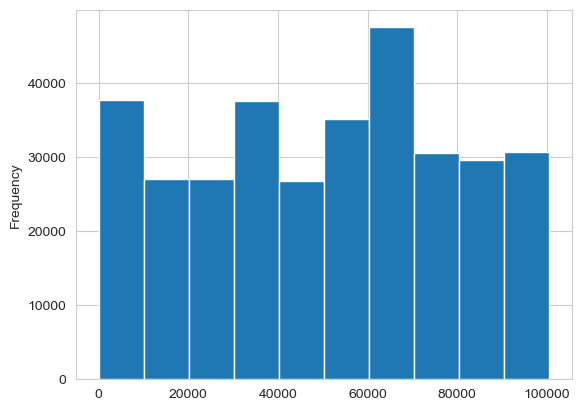

In [31]:
train['IDENTITY'].plot(kind = 'hist')
'''This code is using the plot method of pandas series to create a histogram of the ‘IDENTITY’ column of train12.
The kind parameter is set to ‘hist’, which means that the plot will show the frequency distribution of the values in the series.
The plot method returns a matplotlib axes object, which can be further customized with other functions'''

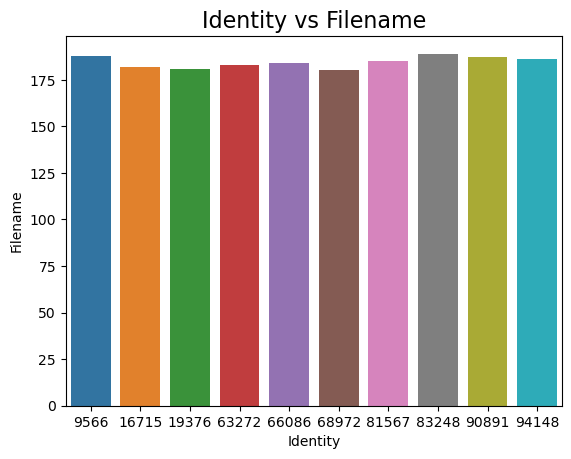

In [32]:
plt.style.use("default")
sns.barplot(x = "IDENTITY", y = "FILENAME", data = train[180:190])
plt.title("Identity vs Filename", fontsize = 16)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()

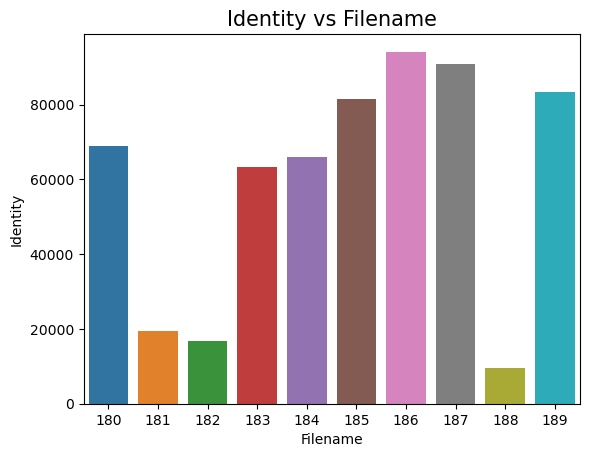

In [33]:
plt.style.use("default")
sns.barplot(x = "FILENAME", y = "IDENTITY", data = train[180:190])
plt.title("Identity vs Filename", fontsize = 15)
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

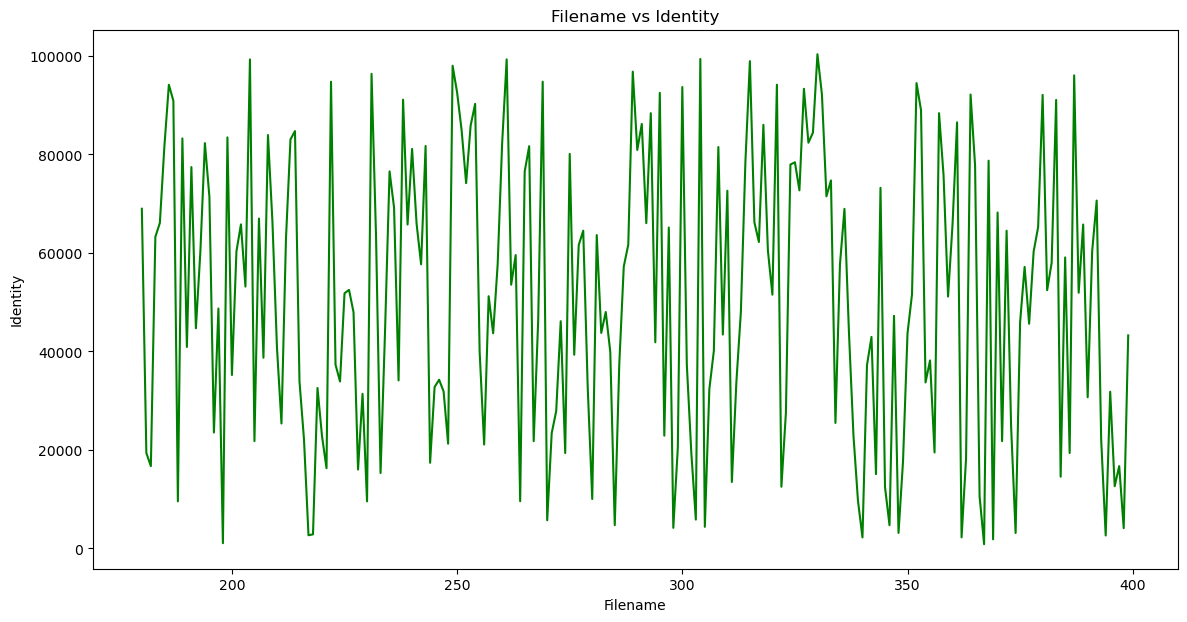

In [34]:
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.lineplot(x = "FILENAME", y = "IDENTITY", data = train[180:400], color = 'g')
plt.title("Filename vs Identity")
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

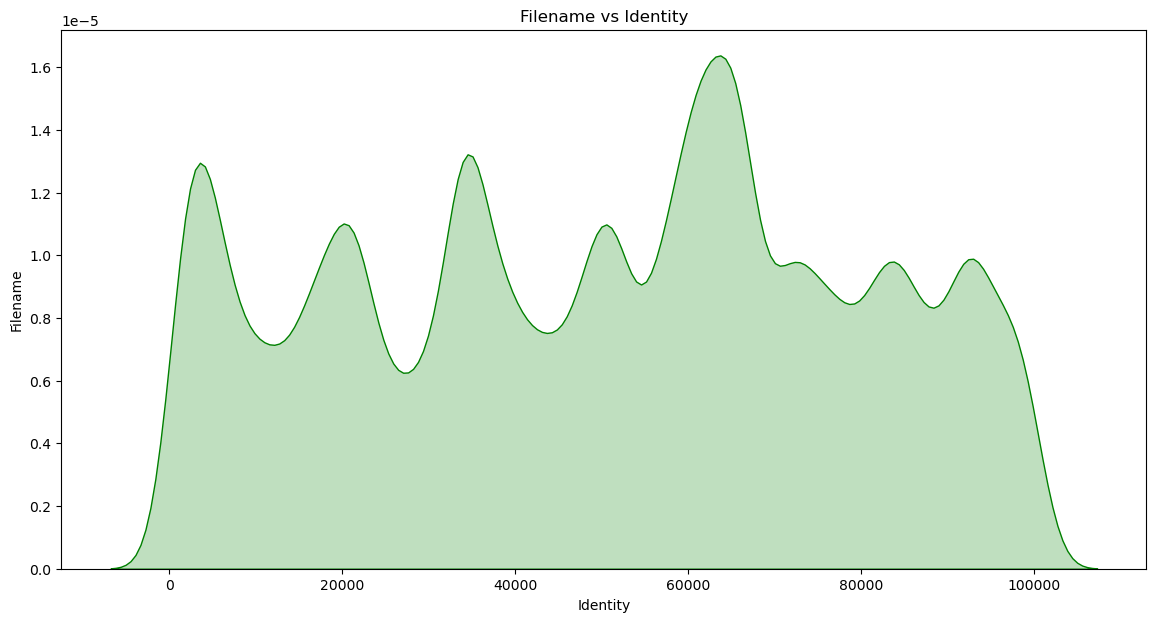

In [35]:
#KDE Plot
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.kdeplot(train['IDENTITY'], shade = True, color = 'g')
plt.title("Filename vs Identity")
plt.ylabel("Filename")
plt.xlabel("Identity")
plt.show()

<Axes: xlabel='FILENAME', ylabel='IDENTITY'>

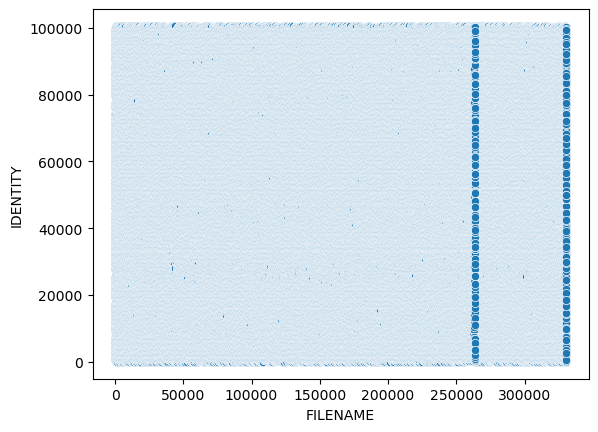

In [36]:
sns.scatterplot(x = 'FILENAME', y = "IDENTITY", data  = train)

TRAINING AND TESTING DATA

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

In [38]:
print(len(X))
print(len(y))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

330396
330396
231277
99119
231277
99119


In [39]:
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=80,activation='relu',name = 'input_layer'),
      tf.keras.layers.Dense(units=60,activation='relu',name = 'dense_layer1'),
      tf.keras.layers.Dense(units=40,activation='relu',name = 'dense_layer2'),
      tf.keras.layers.Dense(units=1,name='Output_layer')
],name='Model')   # Dropout and Batch Normalization can also be used.


        
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',        # In loss mae can also be used.
    metrics=['binary_accuracy'],
)


history = model.fit(X_train,y_train,batch_size = 256,
    epochs=150,
)

Epoch 1/150
904/904 [==============================] - 6s 5ms/step - loss: 2549279.0000 - binary_accuracy: 0.0000e+00
Epoch 2/150
904/904 [==============================] - 4s 4ms/step - loss: 2549277.0000 - binary_accuracy: 0.0000e+00
Epoch 3/150
904/904 [==============================] - 3s 4ms/step - loss: 2549279.0000 - binary_accuracy: 0.0000e+00
Epoch 4/150
904/904 [==============================] - 4s 5ms/step - loss: 2549276.0000 - binary_accuracy: 0.0000e+00
Epoch 5/150
904/904 [==============================] - 4s 5ms/step - loss: 2549276.0000 - binary_accuracy: 0.0000e+00
Epoch 6/150
904/904 [==============================] - 3s 3ms/step - loss: 2549279.2500 - binary_accuracy: 0.0000e+00
Epoch 7/150
904/904 [==============================] - 3s 3ms/step - loss: 2549277.0000 - binary_accuracy: 0.0000e+00
Epoch 8/150
904/904 [==============================] - 3s 3ms/step - loss: 2549277.7500 - binary_accuracy: 0.0000e+00
Epoch 9/150
904/904 [==============================] - 4

904/904 [==============================] - 2s 2ms/step - loss: 2549278.2500 - binary_accuracy: 0.0000e+00
Epoch 138/150
904/904 [==============================] - 2s 2ms/step - loss: 2549277.0000 - binary_accuracy: 0.0000e+00
Epoch 139/150
904/904 [==============================] - 2s 2ms/step - loss: 2549277.5000 - binary_accuracy: 0.0000e+00
Epoch 140/150
904/904 [==============================] - 2s 2ms/step - loss: 2549277.5000 - binary_accuracy: 0.0000e+00
Epoch 141/150
904/904 [==============================] - 2s 2ms/step - loss: 2549278.0000 - binary_accuracy: 0.0000e+00
Epoch 142/150
904/904 [==============================] - 2s 3ms/step - loss: 2549276.7500 - binary_accuracy: 0.0000e+00
Epoch 143/150
904/904 [==============================] - 2s 3ms/step - loss: 2549277.2500 - binary_accuracy: 0.0000e+00
Epoch 144/150
904/904 [==============================] - 2s 2ms/step - loss: 2549275.5000 - binary_accuracy: 0.0000e+00
Epoch 145/150
904/904 [==============================]

In the previous code we made a mode where input layer have 80 neurons. 

In [40]:
y_pred = model.predict(X_test)
y_pred

3098/3098 [==============================] - 6s 2ms/step


array([[ -2556.957 ],
       [ -2489.9612],
       [-10763.124 ],
       ...,
       [-11922.15  ],
       [ -8874.382 ],
       [ -4055.9194]], dtype=float32)

'history.history is an attribute of the history object that is returned by the model.fit() method in tensorflow.keras.\nIt is a dictionary that records the training loss values and metrics values at successive epochs, as well as the validation loss values and validation metrics values (if applicable). \nYou can access the values of each key (such as ‘loss’ or ‘val_loss’) as a list of floats.\nYou can use these values to plot the learning curves of your model and evaluate its performance over time.'

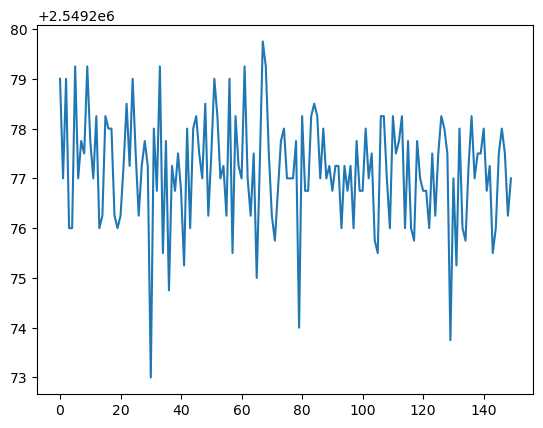

In [41]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
'''history.history is an attribute of the history object that is returned by the model.fit() method in tensorflow.keras.
It is a dictionary that records the training loss values and metrics values at successive epochs, as well as the validation loss values and validation metrics values (if applicable). 
You can access the values of each key (such as ‘loss’ or ‘val_loss’) as a list of floats.
You can use these values to plot the learning curves of your model and evaluate its performance over time.'''

In [42]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 80)                160       
                                                                 
 dense_layer1 (Dense)        (None, 60)                4860      
                                                                 
 dense_layer2 (Dense)        (None, 40)                2440      
                                                                 
 Output_layer (Dense)        (None, 1)                 41        
                                                                 
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________


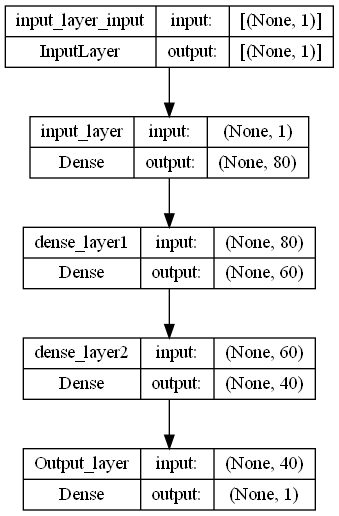

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

Best validation Loss: 2549273.0000
Best Validation Accuracy :0.0000


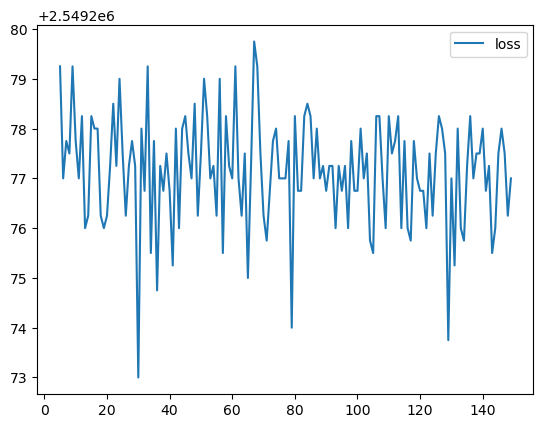

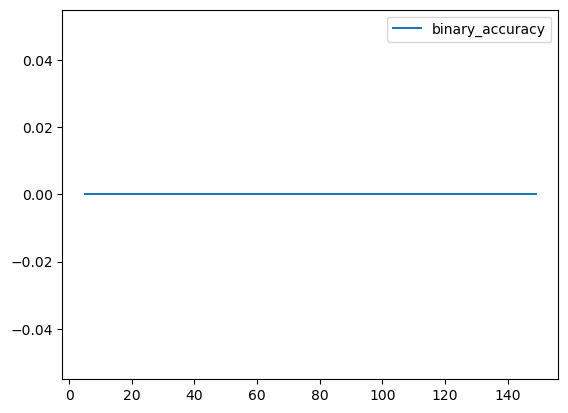

In [44]:
history_df = pd.DataFrame(history.history)
#start the plot at epoch 5
history_df.loc[5:,['loss']].plot()
history_df.loc[5:,['binary_accuracy']].plot()
print(("Best validation Loss: {:0.4f}"+\
      "\nBest Validation Accuracy :{:0.4f}")\
     .format(history_df['loss'].min(),
            history_df['binary_accuracy'].max()))

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
min_delta = 0.001,

patience = 20,
restore_best_weights = True,
)

In [46]:
model.evaluate(X_test,y_test)

3098/3098 [==============================] - 8s 2ms/step - loss: 2545567.2500 - binary_accuracy: 1.0089e-05


[2545567.25, 1.0088882845593616e-05]